# 6.3 Спектральный метод для линейной краевой задачи

Миллер Владимир (696а)

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
def calculate(n, f, a, b):
    # Строим Чебышёвскую сетку.
    xs = np.arange(n, dtype=np.float64)
    xs = np.cos(np.pi/(2*n) + np.pi/n * xs[::-1])
    # Сетка отсортирована в порядке возрастания.
    
    # Строим матрицу системы.
    A = np.zeros((n, n), dtype=np.float64)
    hl, hr = xs[0] + 1, xs[1] - xs[0]
    A[0, 0], A[0, 1] = -2 / (hl*hr), 2 / (hr*(hr+hl))
    hl, hr = xs[n-1] - xs[n-2], 1 - xs[n-1]
    A[n-1, n-2], A[n-1,n-1] = 2 / (hl*(hl+hr)), -2 / (hl*hr)
    for i in range(1, n-1):
        hl, hr = xs[i] - xs[i-1], xs[i+1] - xs[i]
        A[i, i-1] = 2 / (hl*(hl+hr))
        A[i, i] = -2 / (hl*hr)
        A[i, i+1] = 2 / (hr*(hr+hl))

    # Строим правую часть системы.
    F = np.zeros(n, dtype=np.float64)
    F = f(xs)
    hl, hr = xs[0] + 1, xs[1] - xs[0]
    F[0] -= 2*a / (hl*(hl+hr))
    hl, hr = xs[n-1] - xs[n-2], 1 - xs[n-1]
    F[n-1] -= 2*b / (hr*(hr+hl))
    
    # Получаем решение системы.
    U = np.linalg.solve(A, F)
    
    return xs, U

## Графики точных и численных решений

In [70]:
def plot_ax(ax, axtitle, grid, xs, u, U):
    ax.axvline(0, color="black", linewidth=1, alpha=0.5)
    ax.axhline(0, color="black", linewidth=1, alpha=0.5)
    ax.plot(grid, u(grid), 'k-', label="Точное")
    ax.plot(xs, U, 'o', label="Численное")
    ax.legend()
    ax.set_title(axtitle)

In [92]:
N = 4

f0 = lambda x: np.exp(x)
u0 = lambda x: np.exp(x)
a0, b0 = u0(-1), u0(1)
xs0, U0 = calculate(N, f0, a0, b0)

f1 = lambda x: np.sin(x)
u1 = lambda x: -np.sin(x)
a1, b1 = u1(-1), u1(1)
xs1, U1 = calculate(N, f1, a1, b1)

f2 = lambda x: 2 + np.zeros_like(x)
u2 = lambda x: np.power(x, 2)
a2, b2 = u2(-1), u2(1)
xs2, U2 = calculate(N, f2, a2, b2)

f3 = lambda x: -2*x / (1 + x**2)**2
u3 = lambda x: np.arctan(x)
a3, b3 = u3(-1), u3(1)
xs3, U3 = calculate(N, f3, a3, b3)

In [88]:
def plot_all():
    print(f"N = {N}")

    grid = np.linspace(-1, 1, 512)
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    plot_ax(axs[0], "$f(x)=e^x$\n$u(-1)=e^{-1}$, $u(1)=e^1$", grid, xs0, u0, U0)
    plot_ax(axs[1], "$f(x)=sin(x)$\n$u(-1)=-sin(-1)$, $u(1)=-sin(1)$", grid, xs1, u1, U1)
    plot_ax(axs[2], "$f(x)=2$\n$u(-1)=1$, $u(1)=1$", grid, xs2, u2, U2)
    plot_ax(axs[3], "$f(x)=arctan''(x)$\n$u(-1)=arctan(-1)$, $u(1)=arctan(1)$", grid, xs3, u3, U3)

    fig.suptitle("Решения $u''(x)$ = $f(x)$", fontsize=16)
    fig.subplots_adjust(top=0.8)

N = 16


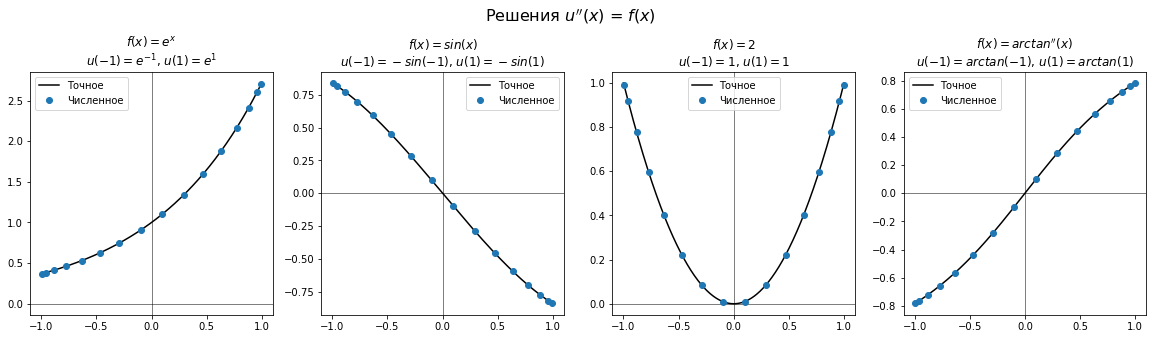

In [89]:
plot_all()

N = 8


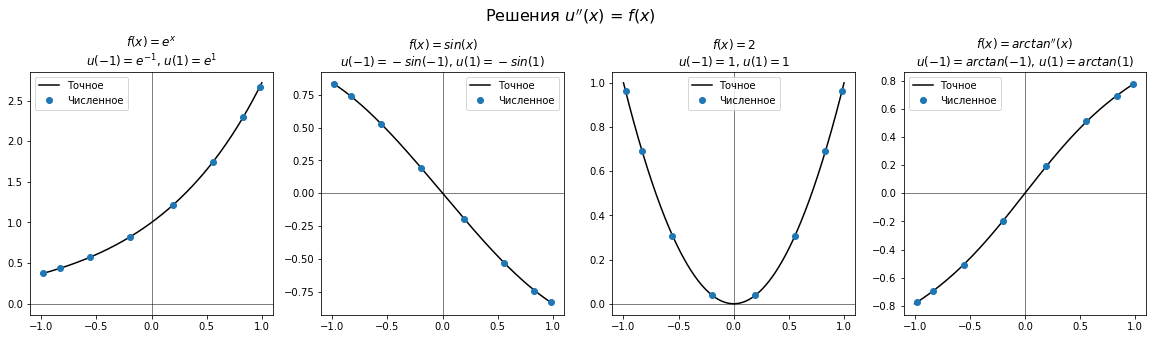

In [91]:
plot_all()

N = 4


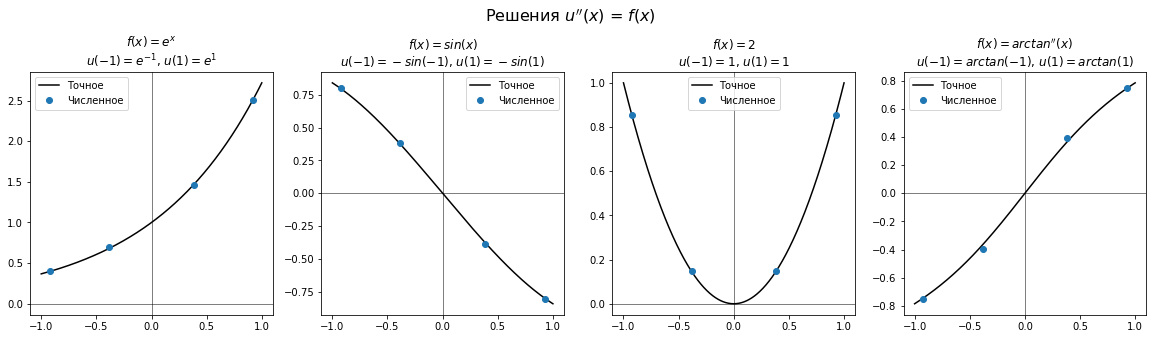

In [93]:
plot_all()

## Графики ошибок

In [121]:
def show_errors(f, u, a, b, Nmax):
    err_history = []
    Ns = list(range(2, Nmax))
    
    # Calculate erros.
    for N in Ns:
        xs, U = calculate(N, f, a, b)
        err_history.append(np.max(u(xs) - U))
    
    # Show errors.
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#     ax.plot(Ns, err_history, 'k-')
#     ax.semilogy(Ns, err_history, 'k-')
    ax.loglog(Ns, err_history, 'k-')
    ax.set_xlabel("Размер сетки")
    ax.set_ylabel("Ошибка")

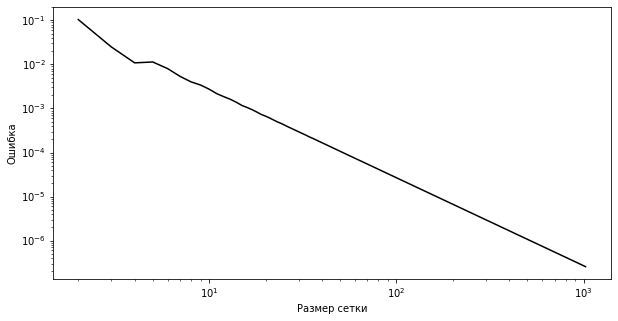

In [122]:
f = lambda x: np.exp(x)
u = lambda x: np.exp(x)
a, b = u(-1), u(1)

show_errors(f, u, a, b, 1024)

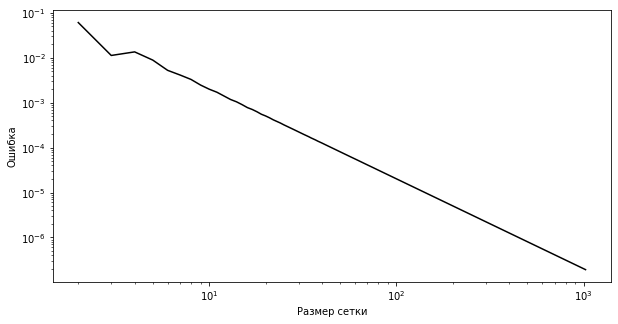

In [123]:
f = lambda x: np.sin(x)
u = lambda x: -np.sin(x)
a, b = u(-1), u(1)

show_errors(f, u, a, b, 1024)

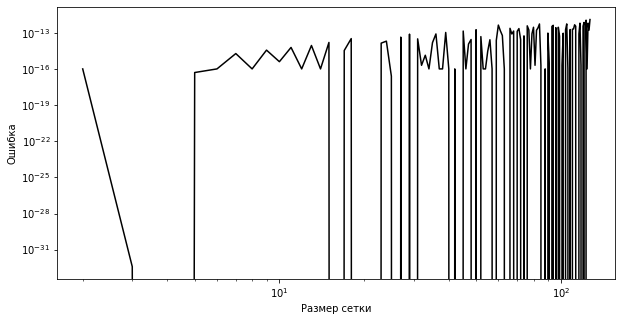

In [127]:
f = lambda x: 2 + np.zeros_like(x)
u = lambda x: np.power(x, 2)
a, b = u(-1), u(1)

show_errors(f, u, a, b, 128)

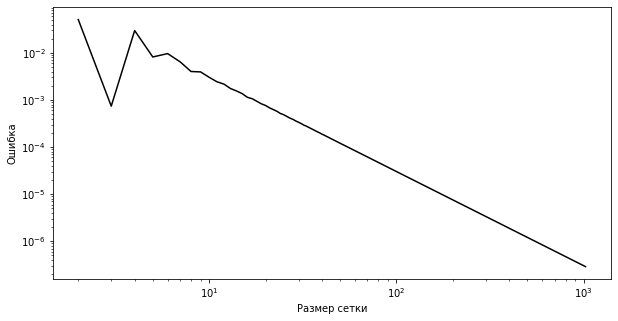

In [124]:
f = lambda x: -2*x / (1 + x**2)**2
u = lambda x: np.arctan(x)
a, b = u(-1), u(1)

show_errors(f, u, a, b, 1024)